In [3]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


In [4]:
df = pd.read_csv("/content/drive/MyDrive/AI work/AB_NYC_2019.csv")

print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (48895, 16)
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149            

In [5]:
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review      

In [6]:
# Drop irrelevant text columns (not useful for ML)
df_clean = df.drop(columns=["id", "name", "host_name", "last_review"])

# Fill missing values in reviews_per_month with 0
df_clean["reviews_per_month"] = df_clean["reviews_per_month"].fillna(0)

# Drop remaining missing rows
df_clean = df_clean.dropna()

print("Clean Dataset Shape:", df_clean.shape)


Clean Dataset Shape: (48895, 12)


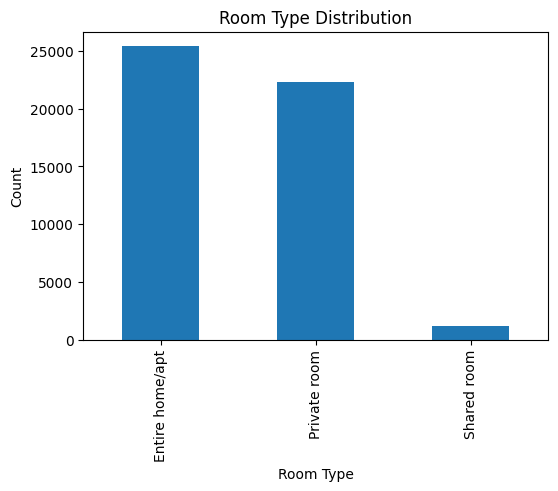

In [7]:
plt.figure(figsize=(6,4))
df_clean["room_type"].value_counts().plot(kind="bar")
plt.title("Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()


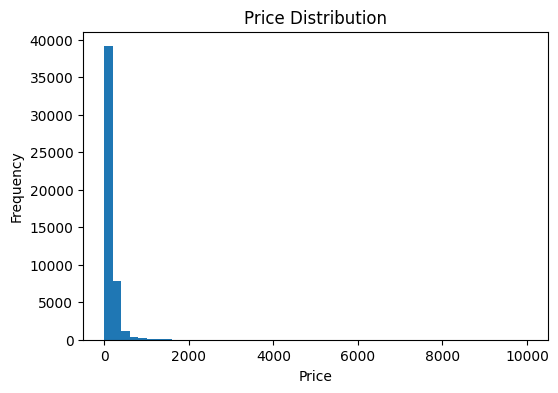

In [8]:
plt.figure(figsize=(6,4))
plt.hist(df_clean["price"], bins=50)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


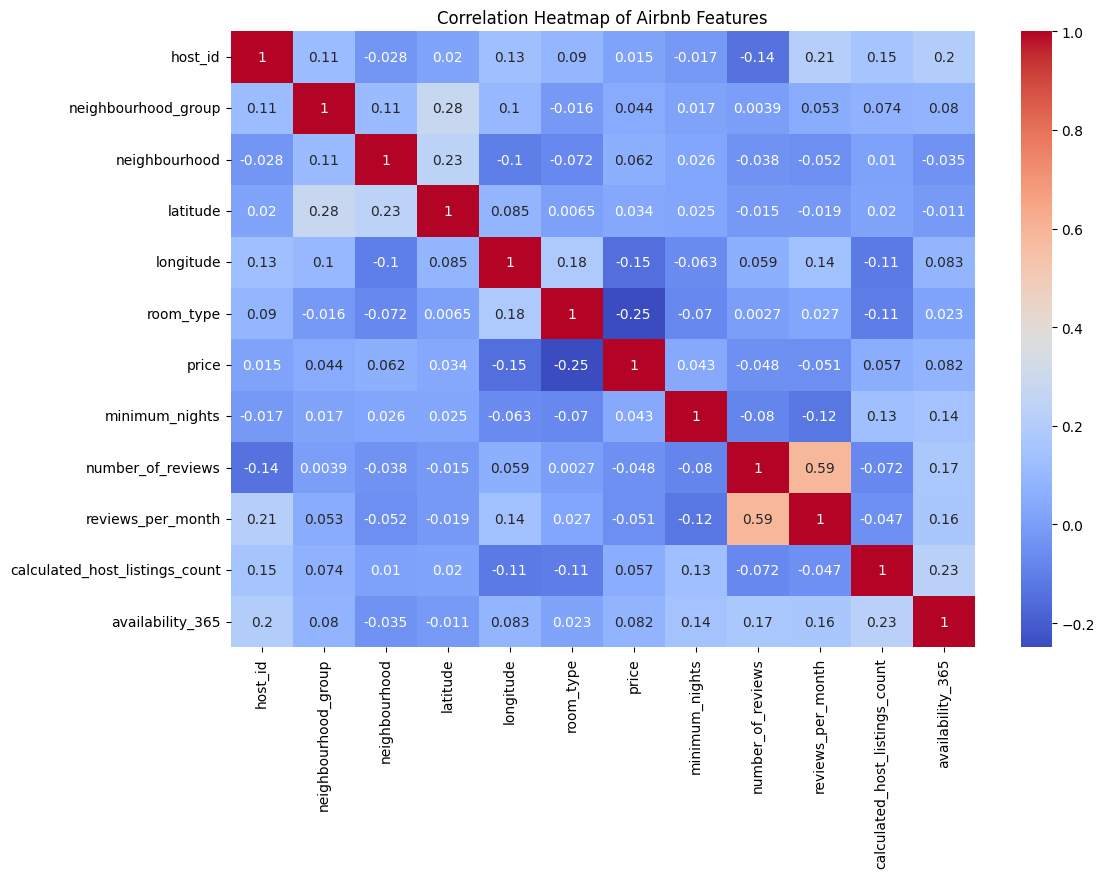

In [9]:
# Copy dataset for encoding
df_encoded = df_clean.copy()

# Encode categorical columns
label_encoders = {}
for col in ["neighbourhood_group", "neighbourhood", "room_type"]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Correlation matrix
corr_matrix = df_encoded.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Airbnb Features")
plt.show()


In [10]:
# Features (X) and Target (y)
X = df_encoded.drop("room_type", axis=1)
y = df_encoded["room_type"]

print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)


Feature Shape: (48895, 11)
Target Shape: (48895,)


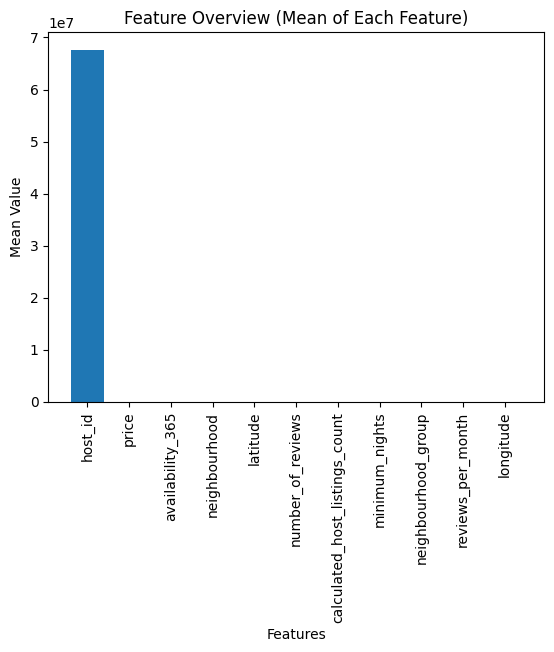

In [11]:

# Compute mean of each feature
feature_means = X.mean().sort_values(ascending=False)

# Plot
plt.figure()
plt.bar(feature_means.index, feature_means.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.title("Feature Overview (Mean of Each Feature)")
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])


Training Samples: 39116
Testing Samples: 9779


In [10]:
log_model = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=2000))
])

# Train model
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Accuracy
log_acc = accuracy_score(y_test, y_pred_log)

print("\nLogistic Regression Accuracy:", log_acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))



Logistic Regression Accuracy: 0.8059106248082626

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      5082
           1       0.75      0.87      0.81      4465
           2       0.00      0.00      0.00       232

    accuracy                           0.81      9779
   macro avg       0.54      0.55      0.54      9779
weighted avg       0.79      0.81      0.80      9779



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)

tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

tree_acc = accuracy_score(y_test, y_pred_tree)

print("\nDecision Tree Accuracy:", tree_acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))



Decision Tree Accuracy: 0.83975866653032

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      5082
           1       0.83      0.82      0.83      4465
           2       0.63      0.29      0.40       232

    accuracy                           0.84      9779
   macro avg       0.77      0.66      0.70      9779
weighted avg       0.84      0.84      0.84      9779



In [12]:
nn_model = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(hidden_layer_sizes=(64,32),
                         activation="relu",
                         solver="adam",
                         max_iter=50,
                         random_state=42))
])

nn_model.fit(X_train, y_train)

y_pred_nn = nn_model.predict(X_test)

nn_acc = accuracy_score(y_test, y_pred_nn)

print("\nNeural Network Accuracy:", nn_acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))



Neural Network Accuracy: 0.8517230800695368

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      5082
           1       0.85      0.83      0.84      4465
           2       0.78      0.31      0.45       232

    accuracy                           0.85      9779
   macro avg       0.83      0.68      0.72      9779
weighted avg       0.85      0.85      0.85      9779



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


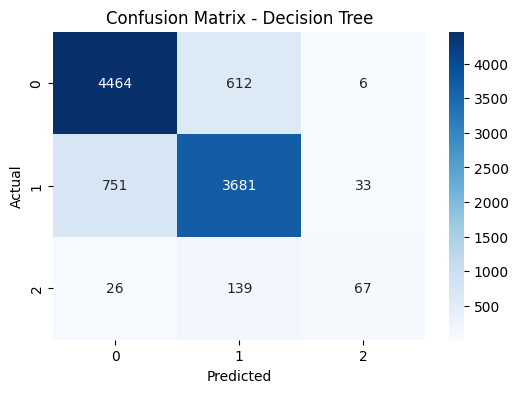

In [13]:
cm = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [14]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Neural Network"],
    "Accuracy": [log_acc, tree_acc, nn_acc]
})

print("\nFinal Model Comparison:")
print(results)



Final Model Comparison:
                 Model  Accuracy
0  Logistic Regression  0.805911
1        Decision Tree  0.839759
2       Neural Network  0.851723


In [15]:
best_model = results.loc[results["Accuracy"].idxmax()]

print("\nBest Performing Model:")
print(best_model)



Best Performing Model:
Model       Neural Network
Accuracy          0.851723
Name: 2, dtype: object
